# Ferromagnetic 2D square lattice XY model using NumPy and Numba

## Import the required libraries.

In [1]:
import numpy as np
from Metropolis_functions import Metropolis_slow_quench
from Observables import get_specificheat, get_squared_magnetisation
import matplotlib.pyplot as plt

## Initialise the required variables

In [2]:
J = 1 # coupling constant, where it must be > 0 for the system to exhibit ferromagnetism
L = 64 # dimension of the square lattice

tau = 1000000 # relaxation time a.k.a equilibrating time
nrelax = 100 # total number of times to let the system equilibrate
nframes = 1 # total number of frames in the .gif over the whole simulation (not needed since we are not generating the animated .gif in this notebook)
N = nrelax * tau # total number of iterations in the Metropolis algorithm
plot_at_Nth_index = np.array([0],dtype=np.int32) # (not needed since we are not generating the animated .gif in this notebook)

lattice = np.zeros((L, L))

Tc = 0.892937 * J  # http://www.lps.ens.fr/~krauth/images/7/72/Stage_Mayer_Johannes_2015.pdf in units of kB
T_init = 0.5
T_final = 2*Tc
TTc_array = np.linspace(T_init, T_final, nrelax)

## Begin the Metropolis time-marching on the lattice

In [3]:
lattices_relax, _, _ = Metropolis_slow_quench(
    J=J,
    L=L,
    relaxation_time=tau,
    plot_at_Nth_index=plot_at_Nth_index,
    lattice=lattice,
    T_init=T_init,
    T_final=T_final,
    T_n=nrelax)

## Calculate the physical observables with the simulation results obtained in the previous cell

## Squared magnetisation

Its expression is given as $$\frac{\left\langle M^2\right\rangle}{N^2}=\frac{1}{N^2}\left\langle\left(\sum_{i=1}^{N} \cos \theta_{i}\right)^{2}+\left(\sum_{i=1}^{N} \sin \theta_{i}\right)^{2}\right\rangle$$
where $N=L\times L$.

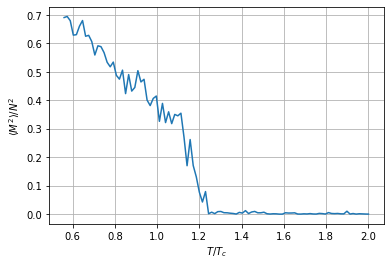

In [4]:
ave_M = get_squared_magnetisation(L,nrelax,lattices_relax)

plt.close()
plt.plot(TTc_array/Tc,ave_M)
plt.xlabel("$T/T_c$")
plt.ylabel("$\langle M^2\\rangle/N^2$")
plt.grid()
plt.show()

## Specific heat

Its expression is given as $$c / k_{\mathrm{B}}=\frac{\left\langle E^{2}\right\rangle-{\langle E\rangle}^{2}}{\left(k_{\mathrm{B}} T\right)^{2}}$$
where $k_B$ is the Boltzmann's constant.

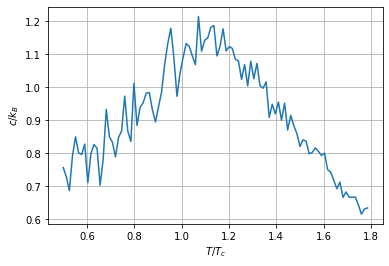

In [5]:
c = get_specificheat(J, nrelax, lattices_relax, TTc_array)

plt.close()
plt.plot(TTc_array,c)
plt.xlabel("$T/T_c$")
plt.ylabel("$c/k_B$")
plt.grid()
plt.show()